  ## CMSE 202 Honors project -ML Heart Disase analysis and Classification
###  James Hager 
### Section_004
#### 4/26/2023

# Heart Disease Predction and Anlalysis using various Machine learning methods.

## Background and Motivation

Given that cardiovascular disease is the leading cause of death worldwide, it is critical to understand the factors that influence your risk of developing the condition. Heart health can be affected by age, cholesterol, blood pressure, and blood sugar levels. However, it is essential to also investigate which factors have a greater impact on heart disease risk. We can take steps to lower our risk of developing heart disease and improve our overall heart health by recognizing and comprehending the factors that contribute to its onset and progression. We can bring down our gamble of coronary illness and raise our chances of carrying on with a long and sound life by tending to these gamble factors through dietary changes, prescription, or different intercessions. A better understanding of how these factors affect heart disease can also help doctors come up with plans for treating people who are at risk of getting it and how to prevent it.

In addition to cardio-vasculardisease, which hasmany factors associated with it, the cost of treating cardiovascular disease in the United States alone is estimated at around 219 billion dollars each year, according to the CDC (this figure includes the cost of health services,medications and premature deaths of patients). In this project, I hope to describe methods that would help to detect heart disease early by identifying patterns and risk factors associated with heart disease. I also aim to improve the effecaciency of treatment by providing health care providers with an automated data entry and analysis of patients.

In this project we will explore three different machine learning algorithms: Support Vector Machine, K-nearest Neighbor, and Random Forest classifier. Also in this project parameters for these algorithms will be tested to see how different paramaters impact the results of the model.

# Important libraries

In [1]:
#Import important basic packages for reading the data
import pandas as pd
import numpy as np


#Import to help visualize the data
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the data set

In [2]:
#Reading data set (From Kaggle)
Heart = pd.read_csv("heart.csv")
pd.option_context('mode.use_inf_as_null', True)
Heart = Heart.dropna()
Heart_2 = Heart
Heart



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Background for the data

### Variables in data set and what they represent

### Data Cleaning

#### Age - Age in years
#### Sex - male or female
#### Chest pain type (0 to 4), four being the worst
#### Resting blood pressure
#### Serum cholestoral(mg/dl)
#### Fasting blood sugar( if > 120 mg/dl)
#### Resting electrocardiographic results (0,1,2)
#### maximum heart rate achieved
#### exercise induced angina
#### oldpeak = ST depression induced by exercise relative to rest
#### Slope -slope of the peak exciersize ST segment
#### ca - number of major vessels (0-3) colored by flourosopy
#### thal 0 = normal; 1 = fixed defect; 2 = reversable defect
#### Target - 0 = no disease and 1 = disease.

These features above are the main factors that I am anlyzing in this project. It is important to note that other factors may impact heart disease.

# Data preporation and cleaning

#### Only Minor data cleaning was required to first to analyze the data set.  Below I am altering the copied data frame to change the sex column to their respective male and female values. I fo this in order to make plotting and labeling easier for the data exploration.

In [3]:
Heart_2.loc[Heart_2['sex'] == 1, 'sex'] = "male"
Heart_2.loc[Heart_2['sex'] == 0, 'sex'] = "female"

Heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,male,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,male,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,female,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
Heart_2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,male,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,male,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,female,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
#Checking for NA values
print(Heart_2.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
#Checking for null values
print(Heart_2.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
#Looking at data types in order to work with column variables
print(Heart_2.dtypes)

age           int64
sex          object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


### Analyzing the variables(columns) in the data set and what values that are expected. This also provides information on the range of the varaibles and if there is any outliers or interesting information provided by the data.

#### The range of the age of the patients are 29-77
#### The mean cholesterol of the patients is 246 ( Normal cholesterol for adults is less then 200 mg/dl)

In [8]:
Heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
slope,1025.0,1.385366,0.617755,0.0,1.0,1.0,2.0,2.0


sex
male      713
female    312
Name: count, dtype: int64


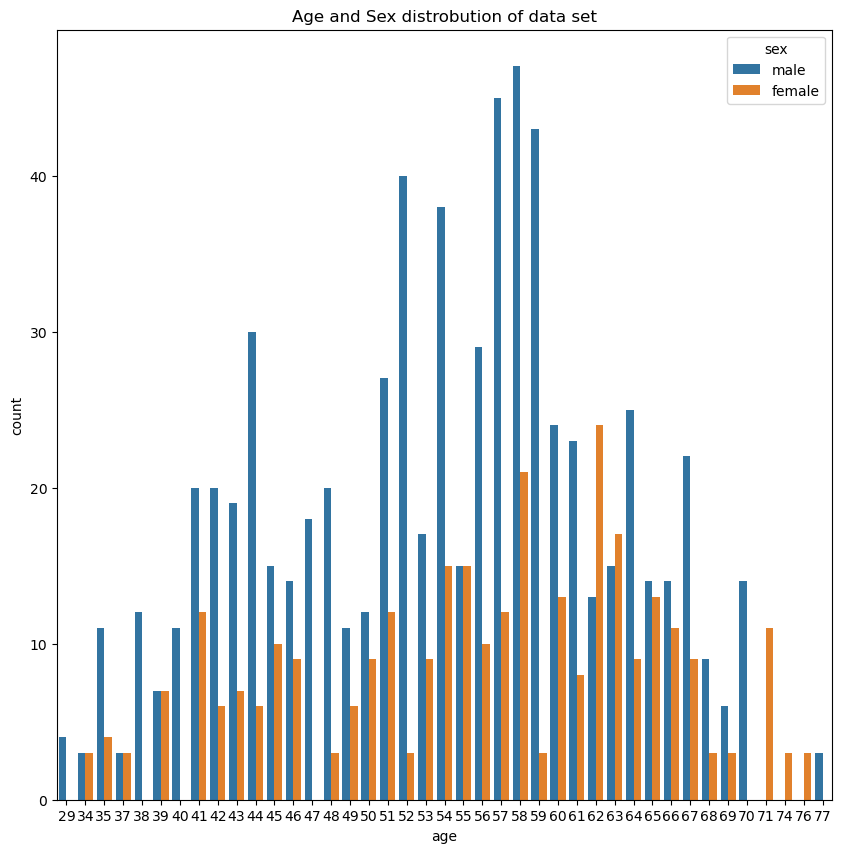

In [9]:
#Plotting to see how age and sex is distributed in the data set
plt.figure(figsize=(10,10))

sns.countplot(x = Heart_2["age"], 
             hue = Heart_2["sex"], 
             hue_order = ["male","female"]).set(title = "Age and Sex distrobution of data set")

print(Heart_2["sex"].value_counts())

#### As seen by the plot above and the counts of the different sexes in the data set, men make up a majority of the data. This could either mean that men or more likely to get cardiovascular dieases, more likely to agree to the data, and or are more likely to receive help with cardiovascular disease. Also Men from the ages of 55-60 are much moe prevelent in the data set. This could mean at this ag

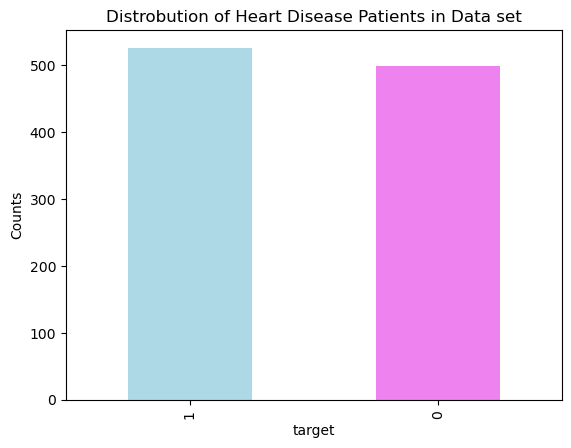

target
1    526
0    499
Name: count, dtype: int64


In [10]:
fig = Heart.target.value_counts().plot(kind = 'bar', color=["lightblue", 'violet'])
plt.title("Distrobution of Heart Disease Patients in Data set")
plt.ylabel("Counts")
plt.show()

print(Heart.target.value_counts())

#### After analyzing the distrobuttion between positive and negative target values, it seems that there is equal data points of both in the data set. This is good because the data is not baised towards patients with or without cardiovascular disease

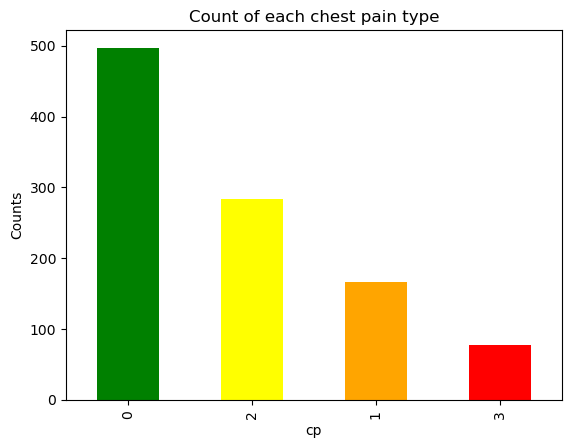

In [11]:
plt.plot(figsize=(5,5))
fig = Heart.cp.value_counts().plot(kind = 'bar', color=["green", 'yellow',"orange","red"])
plt.title("Count of each chest pain type")
plt.ylabel("Counts")
plt.show()

#### This above plot shows that a majority of patients label there chest pain as zero or none. This relatioshio makes sense as there should be less cases with higher self evaulations of chest pain

sex
male      713
female    312
Name: count, dtype: int64


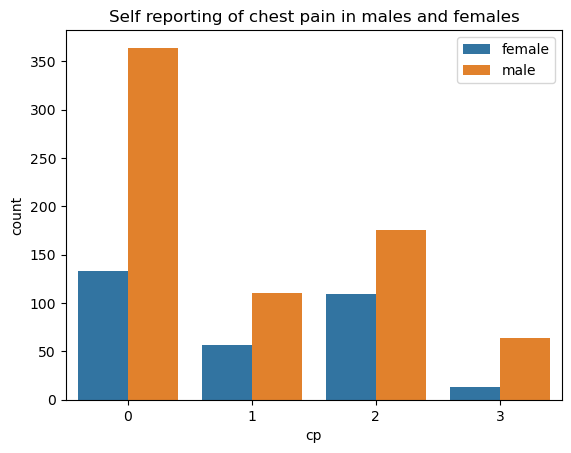

In [12]:
male_cp = Heart_2["sex"] == "male"



sns.countplot(x = Heart_2["cp"],
           hue = male_cp)
plt.legend(labels = ["female","male"])
plt.title("Self reporting of chest pain in males and females")

print(Heart_2["sex"].value_counts())

#### This above plot is very interesting as it shows how self reported of chest pain and sex relate to one another. Even though men make a majority of this data set, they are less likely to report there chest pain as 3(the worst) in the data set

target
0    375
1    122
Name: count, dtype: int64
target
1    134
0     33
Name: count, dtype: int64
target
1    219
0     65
Name: count, dtype: int64
target
1    51
0    26
Name: count, dtype: int64


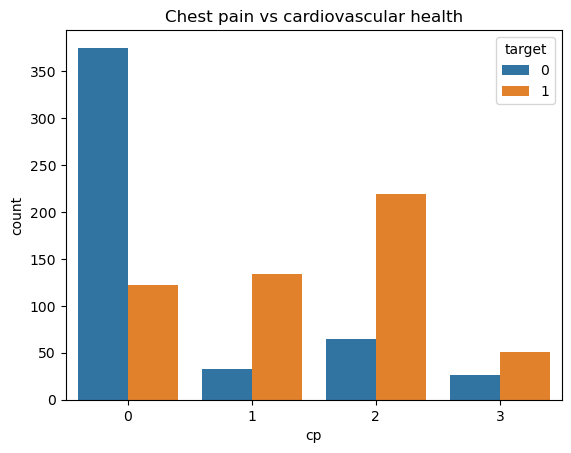

In [13]:
male_cp = Heart_2["sex"] == "male"



sns.countplot(x = Heart_2["cp"],
           hue = Heart_2["target"])
plt.title("Chest pain vs cardiovascular health")


cp_0 = Heart_2.loc[Heart_2['cp'] == 0]
cp_1 = Heart_2.loc[Heart_2['cp'] == 1]
cp_2 = Heart_2.loc[Heart_2['cp'] == 2]
cp_3 = Heart_2.loc[Heart_2['cp'] == 3]

print(cp_0["target"].value_counts())
print(cp_1["target"].value_counts())
print(cp_2["target"].value_counts())
print(cp_3["target"].value_counts())


#### This plot above provides information on how self reported chest pain and positivity for cardiovascular disease are related. This figure shows that chest pain is a factor that could determine if you had cardiovascular disease. People with a self reported chest pain of zero(the lest) where more likely to have no cardiovascular disease. However, in all other reported chest pain levels, you are more likely to have cardiovascular disease then not.

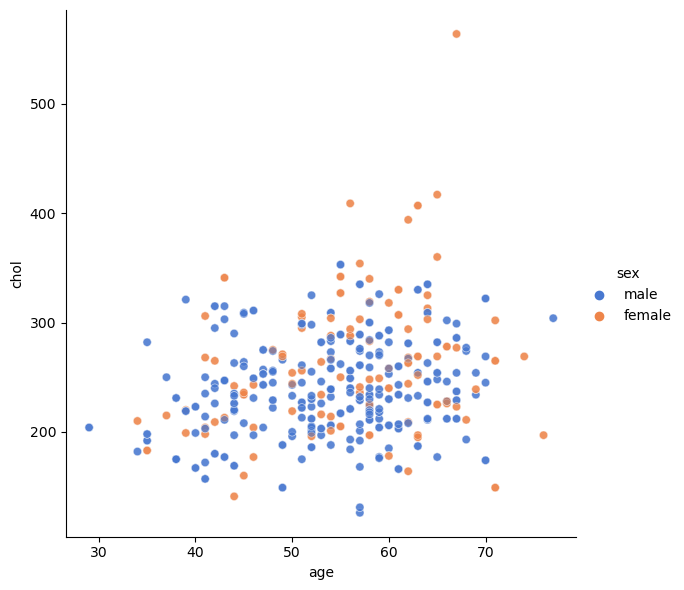

In [14]:
sns.relplot(x="age", y="chol", hue="sex",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=Heart)

#### Not much can be determined from the plot above. There is no abvious relationship between age and cholesteral in the data set. Sex also does not seem to impact the cholesteral in the patients in this data set.

In [15]:
Heart = pd.read_csv("heart.csv")
Heart_corr= Heart.corr()

<AxesSubplot: >

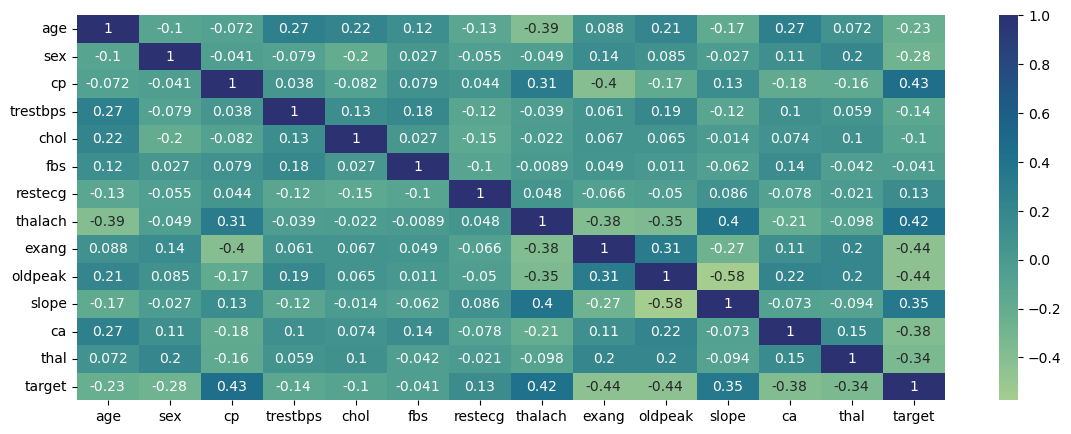

In [16]:
plt.figure(figsize = (14,5))
sns.heatmap((Heart_corr),annot=True,cmap = "crest")

#### Above is a heatmap of the data which allows you to see what features may impact if the data point will be positive for heart disease. One feature that has alot of significance for determing if the data point has heart disease is "cp" or self reported chest pain. This insight makes sense because a main symptom of heart disease is chest pain.

In [17]:
Heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


### Below I am creating the X,y variables which will be used to split the data into dependent and indepdendent variabels.

In [18]:
Heart = pd.read_csv("heart.csv")
X = Heart.drop(columns = 'target', axis = 1)
y = Heart['target']

### The X variable consists of the original data frame but without the target column.

In [19]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


### The y variable consists of the original data frame but only the target column.

In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

### Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#### A Standard Scalar was used as apposed to a Robust scalar or a Normalizer because of the range of values in the data. In this way the algorithms wont be comparing values that range from 0-4 and values that are in the hundreds. Doing this will create a common scale for the features in the data set.

#### Normalizer shouldnt be used because it will compress the values into the same range which will decrease the accuracy of the machine learning models.

#### Robust Scaler should not be used because it is more usefull when dealing with data sets with outliers which this data set does not.


#### StandardScaler removes the mean and scales the data to unit variance.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state = 2)

#### Splitting the data into training and testing to avoid overfitting the data, and makes it easier to test the accuracy of the data.

# SVM model (Support Vector Machine)

In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score

### Model 1: SVM with kernel set to linear

#### It is useful when dealing with large sparse data vectors. It is often used in text categorization. 

In [24]:
svm_model_1 = svm.SVC(kernel = 'linear')

In [25]:
svm_model_1.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
#Printing accuracy score of the model

X_train_prediction = svm_model_1.predict(X_train)
Train_accuracy = accuracy_score(X_train_prediction, y_train)

In [27]:
print("Accuracy score of Linear kernal: " + str(Train_accuracy * 100) + "%")

Accuracy score of Linear kernal: 86.70731707317073%


### Model 2: SVM with kernel set to polynomial

#### Uses a polynomial equation to fit the data. Commonly used in image processing

In [28]:
svm_model_2 = svm.SVC(kernel = 'poly')

In [29]:
svm_model_2.fit(X_train, y_train)

SVC(kernel='poly')

In [30]:
#Printing accuracy score of the model

X_train_prediction = svm_model_2.predict(X_train)
Train_accuracy = accuracy_score(X_train_prediction, y_train)

In [31]:
print("Accuracy score of Polynomial kernal: " + str(Train_accuracy * 100) + "%")

Accuracy score of Polynomial kernal: 94.7560975609756%


### Model 3: SVM with kernel set to Sigmoid

####  Often used for neurel networks

In [32]:
svm_model_3 = svm.SVC(kernel = 'sigmoid')

In [33]:
svm_model_3.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [34]:
#Printing accuracy score of the model

X_train_prediction = svm_model_3.predict(X_train)
Train_accuracy = accuracy_score(X_train_prediction, y_train)

In [35]:
print("Accuracy score of Polynomial sigmoid: " + str(Train_accuracy * 100) + "%")

Accuracy score of Polynomial sigmoid: 77.07317073170732%


#### Overall for the SVM algorithms, the polynomial kernel scored the best at an accuracy score of about 94.75 percent, while linear scored 86.7 percent and sigmoid scored 77.07 percent. This may be due to how each algorithm maps out the data so that it can be linearly seperable.

# KNN model (K Nearest Neighbor)

#### KNN is a supervised machie learning algorithm that uses proximity as a main metric for classification. It does this by first calculating the distance between data points, then it finds the nearest neighbors by ranking the points by increasing distance. Finally it then "votes" on the predicted class label based on the classes of teh k-nearest neighbors. Its important to note that this k value can altered and changed to tune the paramaters of the model.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

### Model 1: KNN model using the defualt k value (5). 

In [37]:
K1 = KNeighborsClassifier()

K1.fit(X_train, y_train)

K1_predicted = K1.predict(X_test)

K1_accuracy_score = accuracy_score(y_test, K1_predicted)


In [38]:
print("Accuracy score of KNN using k = 5: " + str(K1_accuracy_score * 100) + "%")

Accuracy score of KNN using k = 5: 85.85365853658537%


### Model 2: KNN model using the  k value 8

In [39]:
K2 = KNeighborsClassifier(n_neighbors=8)

K2.fit(X_train, y_train)

K2_predicted = K2.predict(X_test)

K2_accuracy_score = accuracy_score(y_test, K2_predicted)

In [40]:
print("Accuracy score of KNN using k = 8: " + str(K2_accuracy_score * 100) + "%")

Accuracy score of KNN using k = 8: 83.90243902439025%


### Model 3: KNN model using the defualt k value and setting the algorithm to Ball_tree

In [41]:
K3 = KNeighborsClassifier(algorithm="ball_tree")

K3.fit(X_train, y_train)

K3_predicted = K3.predict(X_test)

K3_accuracy_score = accuracy_score(y_test, K3_predicted)

In [42]:
print("Accuracy score of KNN using defualt k and ball tree algorithm: " + str(K3_accuracy_score * 100) + "%")

Accuracy score of KNN using defualt k and ball tree algorithm: 85.85365853658537%


### Model 4: KNN model using the defualt k value and setting the algorithm to KD tree

In [43]:
K4 = KNeighborsClassifier(algorithm="kd_tree")

K4.fit(X_train, y_train)

K4_predicted = K4.predict(X_test)

K4_accuracy_score = accuracy_score(y_test, K4_predicted)

In [44]:
print("Accuracy score of KNN using defualt k and ball tree algorithm: " + str(K4_accuracy_score * 100) + "%")

Accuracy score of KNN using defualt k and ball tree algorithm: 85.85365853658537%


#### Overall the K value or n_neighbors parameter seemed to have the greatest impact on the accuracy score. The algorithm did not have any impact on the accuracy score and received the same score as the default KNN algorithm. These algorithms may have an important use for other kinds of data, but not in this data. However, from the findings above, n_neighbors should be the first paramater to tune when working with KNN to increase your algorithm accuracy.

# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

### Model 1: Random Forest Classifier with defualt parameters.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state = 2)


RF1 = RandomForestClassifier(random_state=12)

RF1.fit(X_train,y_train)

RF1_predicted = RF1.predict(X_test)

RF1_accuracy_score = accuracy_score(y_test,RF1_predicted)


In [47]:
import time
start_time = time.time()
importances = RF1.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF1.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.006 seconds


In [48]:
Heart


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


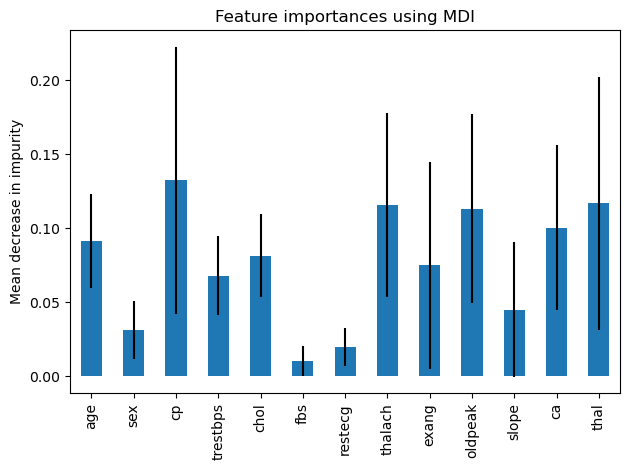

In [49]:


feature_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]

forest_importances = pd.Series(importances, index = feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### By using MDI(Mean Decrease in Impurity) to find feature importance, we can see which features impact the classification of the model the most. It is important to note that using MDI can be be missleading when using high cardinality features(lots of unique values). With this data set I have features that contain many unique data points so its good to cross-validate feature importance detection based on feature purmutation as well.

In [50]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    RF1, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 1.246 seconds


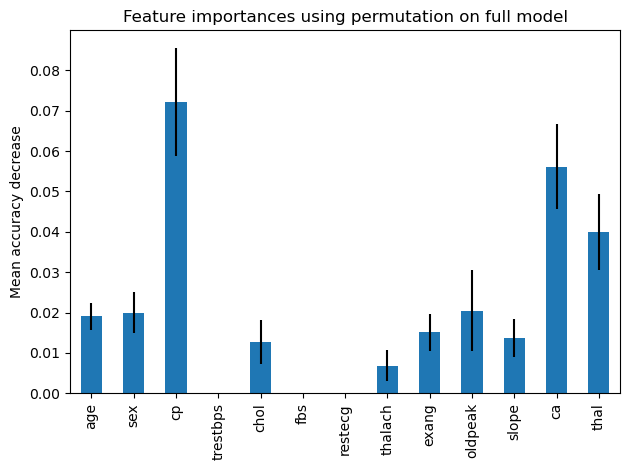

In [51]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### Above it can be seen that the two plots are very similar for feature detection so we know that the most important features are oldpeak, slope and thal. This could be very important for analyzing the model because it can tell you what features impacted your classification the most.

In [52]:
RF1_accuracy_score

1.0

#### The above accuracy score could be missleading because getting a perfect or 100% accuracy seems to be out of character especailly when compared to the accuracy of the other models. This high accuracy could be due to repeated data points, or inccorect use of K-Random Forest. To check if there is repated vales

### Model 2: testing data with different test to train split size.

In [53]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.5, stratify = y,random_state = 2)


RF2 = RandomForestClassifier(random_state=12)

RF2.fit(X2_train,y2_train)

RF2_predicted = RF2.predict(X2_test)

RF2_accuracy_score = accuracy_score(y2_test,RF2_predicted)



In [54]:
print("Accuracy Score of K-Random Forest with different train test split (.5): " + str(RF2_accuracy_score * 100) + "%")

Accuracy Score of K-Random Forest with different train test split (.5): 97.46588693957115%


# Conlclusion

####

Recources: 

Dataset- https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Background information-
https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel
https://www.cdc.gov/policy/polaris/healthtopics/heartdisease/index.html

Scikit Learn documenation for Machine Learning models:

SVM- https://scikit-learn.org/stable/modules/svm.html

KNN- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Random Forest Classifier- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Feature detection importance(Random Forest Classifier)-https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Plotting:

Seaborn- https://seaborn.pydata.org/generated/seaborn.relplot.html

Information on paramters for Machine Learning Models:

SVM kernels- https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/